In [1]:
import datetime as dt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

In [2]:
datum = 'dTHU2_43001M002_ULR6B.neu'
dir_in = 'data/GPS'

In [3]:
pattern = os.path.join(dir_in, datum)
print(pattern)

data/GPS\dTHU2_43001M002_ULR6B.neu


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\dTHU2_43001M002_ULR6B.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                              
1998-11-15  -27.6  128.2     -45.7       2.7      2.5          8.0
1998-11-16  -25.1  123.1     -43.8       3.1      3.3          8.5
1998-11-17  -26.5  125.1     -40.7       2.6      2.5          8.8
1998-11-19  -26.6  127.3     -41.9       2.7      2.7          8.3
1998-11-20  -25.3  126.3     -34.8       2.8      2.7          8.4


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, var, site, period):  
    
    decomposition = seasonal_decompose(df[var], freq = period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    Amplitude = max(seasonal) - min(seasonal)
    
    decomposition.plot();
    df['denoised'] = df[var] - residual
    df['trend'] = trend
    print(f'\n\n{filepath}')
    print(df.head())
    print(f'{site} Seasonal Amplitude =', Amplitude)
    seasonal_amp = pd.DataFrame(list(zip(list({site}), list(Amplitude))),
                            colums = ['Site_Name', 'Seasonal_Amplitude'])
    seasonal_amp.to_csv('GPS_Seasonal_Amplitude_SONEL')

# Change Point Detection
def change_pt_detection(df, var, points):
    model = "l1"  
    algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
    my_bkps = algo.predict(n_bkps=10)

    
def change_pt_plot()
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.suptitle(f"{site}Change Point Detection")
    plt.show()

In [7]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

def test_plot_OLS(df, res, site, var, trend_array):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='', color = 'darkgrey')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))],
           color = 'red')
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {trend_array * 1:.2f} mm/yr", fontsize=20);
    # ax[1].set_title("Residuals");
    plt.suptitle("Thule, Greenland Vertical Land Motion", fontsize=25)
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Vertical Land Motion (mm)', fontsize=20)
    plt.rc('xtick',labelsize=16)
    plt.rc('ytick',labelsize=16)
    plt.savefig(f'figs/test_GPS_OLS_Aesthetic_{site}.png')



data/GPS\dTHU2_43001M002_ULR6B.neu
f: 0


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dTHU2_43001M002_ULR6B.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                           
1998-11-15  -27.6  128.2     -45.7       2.7      2.5          8.0       NaN   
1998-11-16  -25.1  123.1     -43.8       3.1      3.3          8.5       NaN   
1998-11-17  -26.5  125.1     -40.7       2.6      2.5          8.8       NaN   
1998-11-19  -26.6  127.3     -41.9       2.7      2.7          8.3       NaN   
1998-11-20  -25.3  126.3     -34.8       2.8      2.7          8.4       NaN   

            trend  
Year               
1998-11-15    NaN  
1998-11-16    NaN  
1998-11-17    NaN  
1998-11-19    NaN  
1998-11-20    NaN  
THU2 Seasonal Amplitude = 12.92004214963119


TypeError: 'float' object is not iterable

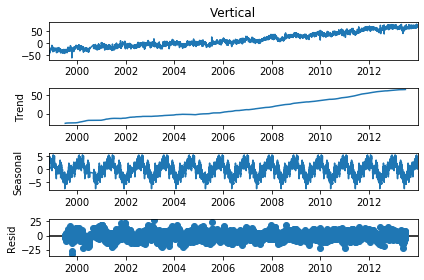

In [8]:
for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    df = read_GPS_SONEL(filepath)
    df = decompose(df, 'Vertical', filepath[-24:-20], 365)
    

In [9]:
def convert_trend_toyearly(df, res):
    
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend

In [ ]:
df = read_GPS_nam14_UNAVCO(filepath)
df.plot()



data/GPS\dTHU2_43001M002_ULR6B.neu
f: 0
Trend = 8.38 mm/yr
                            OLS Regression Results                            
Dep. Variable:               Vertical   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 4.554e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:05:06   Log-Likelihood:                -11495.
No. Observations:                3501   AIC:                         2.299e+04
Df Residuals:                    3499   BIC:                         2.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

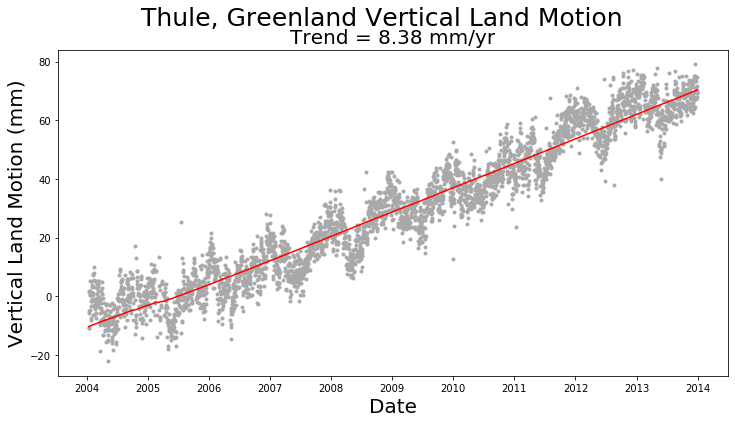

In [10]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)
    df = df[(df.index >= '2004-1-12')]
    
    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    sonel_trend_array[f] = convert_trend_toyearly(df, res)
    
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend = {sonel_trend_array[f] * 1:.2f} mm/yr")
    
    print(res.summary())

    # Make Plot
    test_plot_OLS(df, res, filepath[-24:-20], 'Vertical', sonel_trend_array[f])